# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [99]:
def contador_missing(df):
    dicionario = {}
    for coluna in df.columns:
        dicionario[coluna] = f'Missing: {df[coluna].isna().sum()} valores'
    df_mis = pd.Series(dicionario)
    return df_mis

In [100]:
df_missing = contador_missing(df=df)
df_missing

ORIGEM          Missing: 0 valores
CODESTAB      Missing: 115 valores
CODMUNNASC      Missing: 0 valores
LOCNASC         Missing: 0 valores
IDADEMAE        Missing: 0 valores
                      ...         
munResUf        Missing: 0 valores
munResLat       Missing: 1 valores
munResLon       Missing: 1 valores
munResAlt       Missing: 1 valores
munResArea      Missing: 1 valores
Length: 69, dtype: object

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

Tratamento de dados:

In [101]:
var_interesse = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']
df_ex2 = df[var_interesse]
df_ex2.head(2)

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,Masculino,37 a 41 semanas,5.0
1,8.0,9.0,Feminino,37 a 41 semanas,2.0


In [102]:
df_ex2.shape

(27028, 5)

In [103]:
df_ex2_missing = contador_missing(df=df_ex2)
df_ex2_missing

APGAR1         Missing: 96 valores
APGAR5        Missing: 103 valores
SEXO            Missing: 4 valores
GESTACAO     Missing: 1232 valores
ESTCIVMAE     Missing: 317 valores
dtype: object

In [104]:
df_ex2 = df_ex2.dropna(subset=['APGAR1'])
df_ex2['APGAR1'].isna().sum()

0

In [105]:
df_ex2 = df_ex2.dropna(subset=['APGAR5'])
df_ex2['APGAR5'].isna().sum()

0

In [106]:
print(f"{((df_ex2['SEXO'].isna().sum())/len(df_ex2))*100}%")

0.014858289068013817%


In [107]:
df_ex2 = df_ex2.dropna(subset=['SEXO'])
df_ex2['SEXO'].isna().sum()

0

In [108]:
df_ex2['ESTCIVMAE'].fillna(9, inplace=True)

In [109]:
df_ex2['GESTACAO'].fillna('Ignorado',inplace=True)
df_ex2['GESTACAO'].isna().sum()

0

In [110]:
df_ex2_missing = contador_missing(df=df_ex2)
df_ex2_missing

APGAR1       Missing: 0 valores
APGAR5       Missing: 0 valores
SEXO         Missing: 0 valores
GESTACAO     Missing: 0 valores
ESTCIVMAE    Missing: 0 valores
dtype: object

*Plotagem*

In [111]:
sns.set(style='whitegrid')
plt.rc('figure', figsize=(10,10))

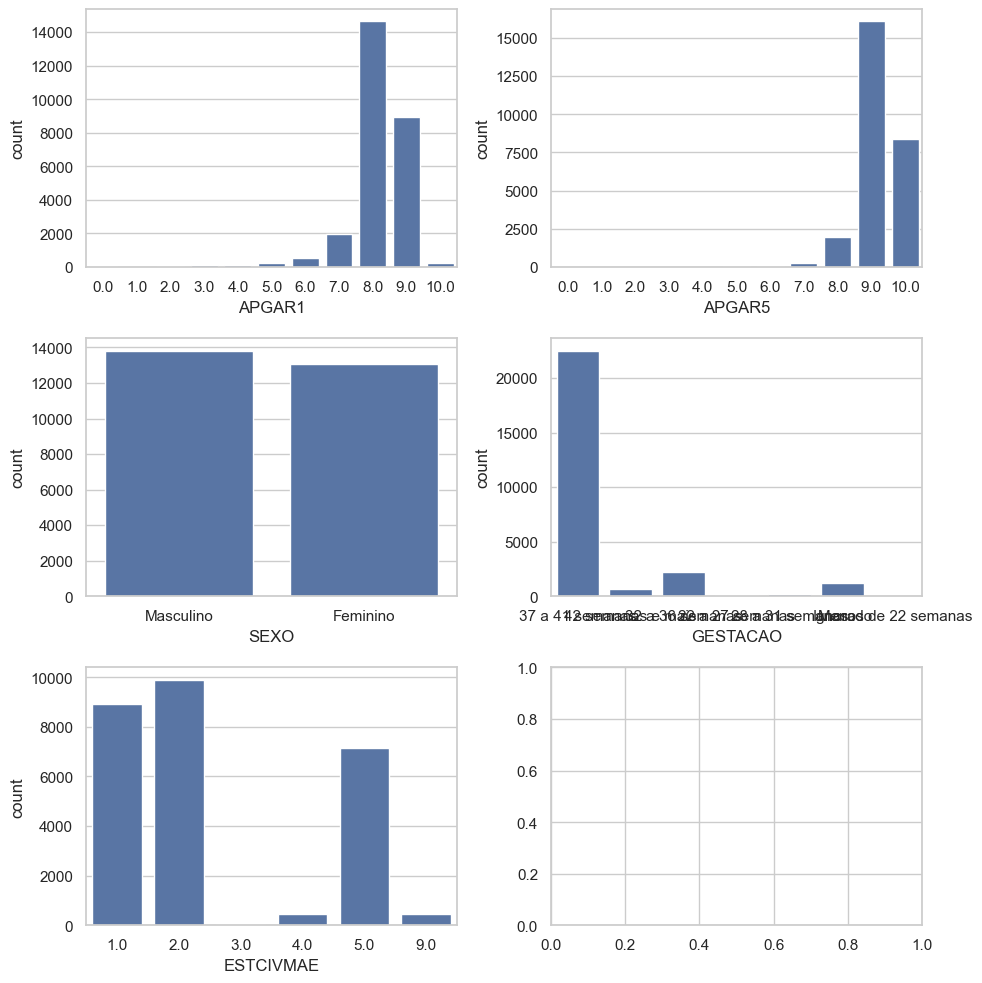

In [112]:
fig,axes = plt.subplots(3,2)

sns.countplot(ax=axes[0,0], x='APGAR1', data=df_ex2)
sns.countplot(ax=axes[0,1], x='APGAR5', data=df_ex2)
sns.countplot(ax=axes[1,0], x='SEXO', data=df_ex2)
sns.countplot(ax=axes[1,1], x='GESTACAO', data=df_ex2, )
sns.countplot(ax=axes[2,0], x='ESTCIVMAE', data=df_ex2)
plt.tight_layout()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [114]:
df_ex3 = df[['APGAR5', 'CONSULTAS']]
df_ex3.head(2)

,APGAR5,CONSULTAS
0,10.0,4
1,9.0,4


In [116]:
df3_missing = contador_missing(df=df_ex3)
df3_missing

APGAR5       Missing: 103 valores
CONSULTAS      Missing: 0 valores
dtype: object

In [117]:
df_ex3 = df_ex3.dropna(subset=['APGAR5'])
df_ex3['APGAR5'].isna().sum()

0

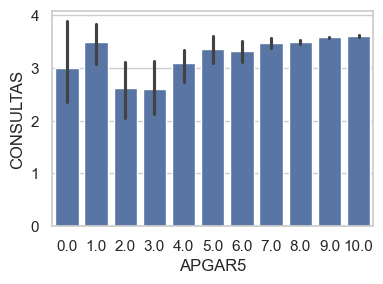

In [126]:
plt.close('all')
fig,axes = plt.subplots(1,1, figz)
sns.barplot(x='APGAR5', y='CONSULTAS', data=df_ex3)
plt.tight_layout()